## Exercise 4
Let's dive into the serious business now!

### Description
[Kaggle](http://www.kagle.com/) is a great platform to learn machine learning. They offer free datasets and organize competitions around them. You can even be paid if you win one of them!

Now that you know how to build a classifier, try with [the titanic dataset!](https://www.kaggle.com/c/titanic).

### Steps
1. Download the dataset.
2. Import it in a jupyter notebook.
3. Analyse the data.
4. Divide the dataset. (train data and test data)
5. Build a classifier using the algorithm of you choice and fit it with your train data.
6. Evaluate the model with your test data.
7. When you're satisfied with the result, fit your model with the complete dataset.
8. Predict the Kaggle's test set and [submit your prediciton](https://www.kaggle.com/c/titanic/overview).
9. Which score did you get?

**DISCLAIMER:** If you look at Kaggle's leaderboard, you will see a lot of people have a score of 100%. They just found the name of people that survived online. Great lesson here, when you are learning something, never compare yourself to others. All that matters is what you've learned.

In [1]:
# Add you code here...
# Add you code here.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Importing the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier





In [2]:
# Load the dataset
train_data  = pd.read_csv('assets/train.csv')
test_data = pd.read_csv('assets/test.csv')

# Display the first few rows of the dataframe
print(train_data .head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(train_data.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:

print(train_data.columns)  # This will help ensure the column names are as expected
# Safely drop columns by checking if they exist in the DataFrame
columns_to_drop = ['Name', 'Ticket', 'Cabin']
train_data = train_data.drop([col for col in columns_to_drop if col in train_data.columns], axis=1, errors='ignore')
test_data = test_data.drop([col for col in columns_to_drop if col in test_data.columns], axis=1, errors='ignore')

# Convert 'Sex' to numeric
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# Handle missing values in 'Age'
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# One-hot encode 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


C:\Users\afshi\AppData\Local\Temp\ipykernel_12820\3035525654.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\afshi\AppData\Local\Temp\ipykernel_12820\3035525654.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [5]:

# Define the features and the target
X_train = train_data.drop('Survived', axis=1)  # Drop 'Survived' column from features
y_train = train_data['Survived']



In [6]:

dc= DecisionTreeClassifier(random_state=42)
dc.fit(X_train, y_train)

# Predict probabilities for the test set
y_probs = dc.predict_proba(X_train)[:, 1]  # Probability scores for the positive class

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, and Thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 1.0


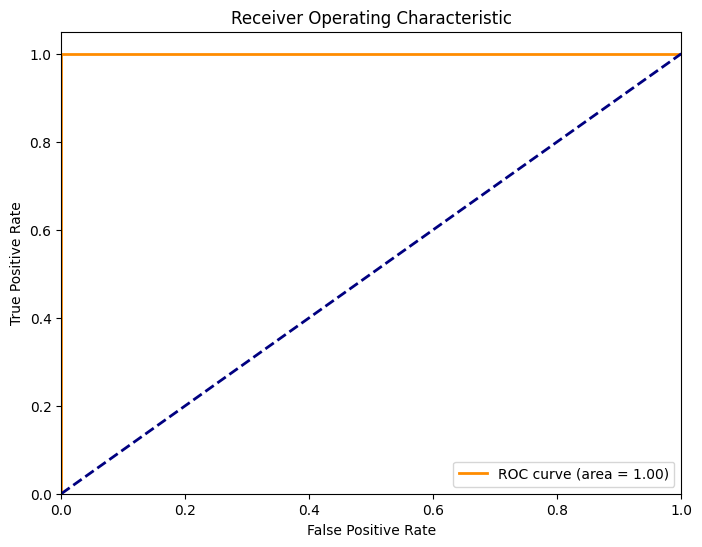

In [8]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [9]:
# Predict 'Survived' for the test set
test_predictions = dc.predict(test_data)

# Create a DataFrame for submission
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

# Save the submission to a CSV file
submission.to_csv('titanic_predictions.csv', index=False)

print("Predictions are saved to 'titanic_predictions.csv'.")


Predictions are saved to 'titanic_predictions.csv'.


In [10]:
# Save the submission to an Excel file
submission.to_excel('titanic_predictions.xlsx', index=False, engine='openpyxl')
print("Predictions are saved to 'titanic_predictions.xlsx'.")

Predictions are saved to 'titanic_predictions.xlsx'.
